In [1]:
import numpy as np
import glob
import os

In [2]:
hetf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data/second parameters/hetero*')
velf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data/second parameters/velocity*')

In [369]:
taus = np.array([2000,20000,200000,600000])
betas = np.array([50])

In [370]:
harr=np.zeros((len(taus),len(betas),100,25000))

for hf in hetf:
    tau = int(hf.split('tau')[1].split('_')[0])
    beta = int(hf.split('B')[1].split('+')[0])
    tau_ind =np.argwhere(tau==taus)[0][0]
    beta_ind = np.argwhere(beta==betas)[0][0]
    ID = int(hf.split('ID')[1].split('_')[0])-1
    arr = np.loadtxt(hf)

    
    harr[tau_ind,beta_ind, ID,:len(arr[:,1])] = arr[:,1]
    #plt.plot(np.loadtxt(hf)[:,1])
    
    

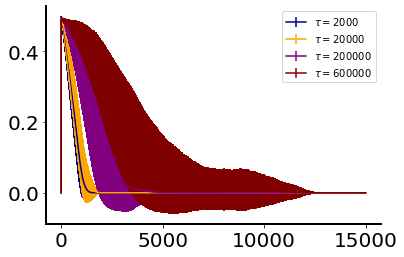

In [383]:
fig,ax = plt.subplots()
colors = ['navy', 'orange', 'purple', 'maroon','grey']
for i in range(4):
    plt.errorbar( np.arange (len(np.mean(harr[i,0,:,10000:],axis=0))), 
                 np.mean(harr[i,0,:,10000:],axis=0), yerr= np.std(harr[i,0,:,10000:],axis=0),c=colors[i],label = r'$\tau = $' + str(taus[i]))
    
    for axis in ['left','bottom']:
        ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend()

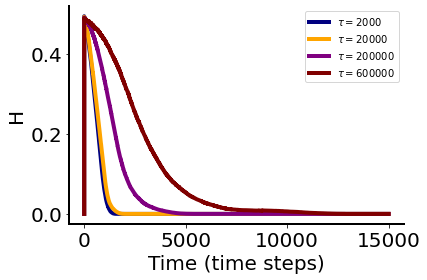

In [422]:
fig,ax = plt.subplots()

for i in range(4):
    ax.plot(np.mean(harr[i,0,:,10000:],axis=0),c=colors[i],label = r'$\tau = $' + str(taus[i]),lw=4)
    
    
#ax.legend(fontsize=12)
for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Time (time steps)',fontsize=20)
ax.set_ylabel('H',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend()

In [396]:
stops =[1500,2000,4000, 6000]
rates = []
for i in range(4):

    r=np.polyfit(np.arange(stops[i]-1),np.log(np.mean(harr[i,0,:,10001:10000+stops[i],],axis=0)),deg=1)[0]
    rates.append(-r)

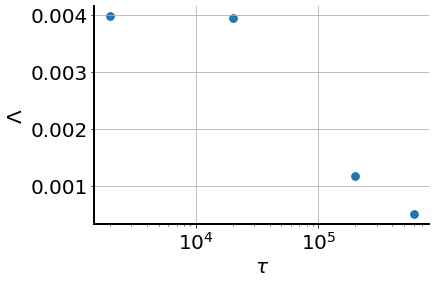

In [423]:
fig,ax = plt.subplots()
ax.scatter (taus,rates,s=60)

ax.set_xscale('log')

#ax.set_yscale('log')


for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$\tau$',fontsize=20)
ax.set_ylabel(r'$\Lambda$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.grid()
#plt.yscale('log')

In [398]:
varr=np.zeros((len(taus),len(betas),100,25000))

for vf in velf:
    tau = int(vf.split('tau')[1].split('_')[0])
    beta = int(vf.split('B')[1].split('+')[0])
    tau_ind =np.argwhere(tau==taus)[0][0]
    beta_ind = np.argwhere(beta==betas)[0][0]
    ID = int(vf.split('ID')[1].split('_')[0])-1
    arr = np.loadtxt(vf)

    
    varr[tau_ind,beta_ind, ID,:len(arr[:,1])] = arr[:,1]
    #plt.plot(np.loadtxt(hf)[:,1])
    
    

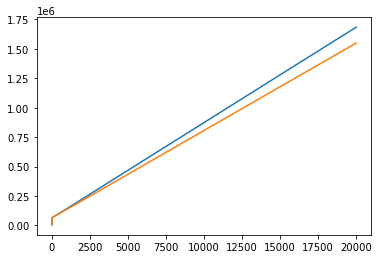

In [399]:
plt.plot(np.mean(varr[0,0,:400,:20000],axis=0))
plt.plot(np.mean(varr[1,0,:400,:20000],axis=0))

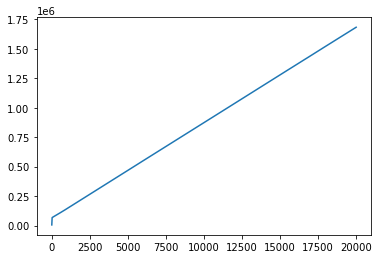

In [400]:

plt.plot(np.mean(varr[0,0,:400,:20000],axis=0))
vels = []
for i in range(4):
    vels.append(np.polyfit(np.arange(20000),np.mean(varr[i,0,:400,:20000],axis=0),1)[0])
#np.polyfit(np.arange(20000),np.mean(varr[0,0,:400,:20000],axis=0),1)
#plt.plot(np.std(varr[0,1,:400,:1000],axis=0))


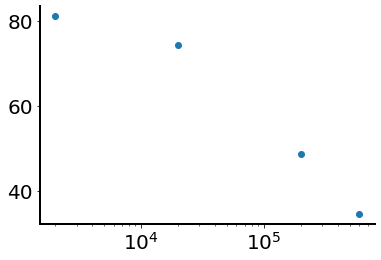

In [401]:
fig,ax = plt.subplots()

ax.set_xscale('log')

ax.scatter(taus,vels)
for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

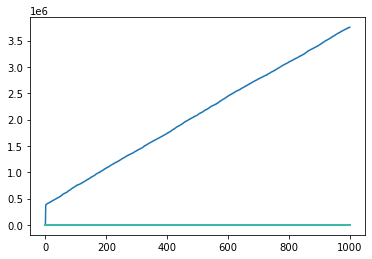

In [230]:
plt.plot(varr[0,1,:,:1000].T)

In [232]:
varr[0,2]

array([[   4999., 1263950., 1277450., ...,       0.,       0.,       0.],
       [   4999., 1271950., 1277450., ...,       0.,       0.,       0.],
       [   4999., 1254000., 1274450., ...,       0.,       0.,       0.],
       ...,
       [   4999., 1270950., 1277450., ...,       0.,       0.,       0.],
       [   4999., 1256980., 1277450., ...,       0.,       0.,       0.],
       [   4999., 1254490., 1278440., ...,       0.,       0.,       0.]])